In [14]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import tree
import numpy as np

In [3]:
x,y=make_regression(n_samples=700,n_features=2,noise=5)

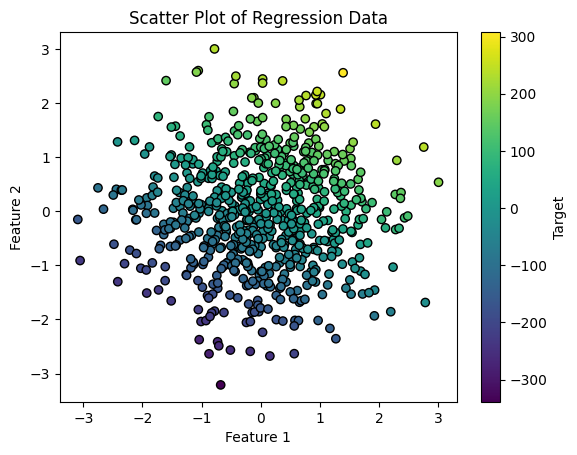

In [4]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.colorbar(label='Target')
plt.title('Scatter Plot of Regression Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [5]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [42]:
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}



In [47]:
tree = DecisionTreeRegressor()
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

C:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python312\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Python312\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Python312\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constrain

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [48]:
print("Best Parameters:", grid_search.best_params_)
print("Best Precision:", grid_search.best_score_)

Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Precision: -236.099761943322


In [49]:
best_model = grid_search.best_estimator_

In [56]:
from sklearn.metrics import mean_squared_error,r2_score
print(f"mean_squared_error={mean_squared_error(y_test,best_model.predict(x_test))}")
print(f"r2_score={r2_score(y_test,best_model.predict(x_test))}")

mean_squared_error=312.9957985398583
r2_score=0.9760020162888352


In [52]:
y_pred=best_model.predict(x_test)

In [55]:
print(y_pred[3])
print(y_test[3])

87.75899923246826
99.41874247669746
